In [4]:
import pdb
import sys
import argparse
import itertools

import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

sys.path.insert(0, '../../../figures')
import plot_utils as pu
import color_scheme as cs

Load data

In [5]:
(mu, sigma), alpha = np.load("data/data.npy", allow_pickle=True)
mu = np.around(mu, 2)

Plot

/home/mhg19/Manuscripts/PNAS19/sci/lib64/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/home/mhg19/Manuscripts/PNAS19/sci/lib64/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply
/home/mhg19/Manuscripts/PNAS19/sci/lib64/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt


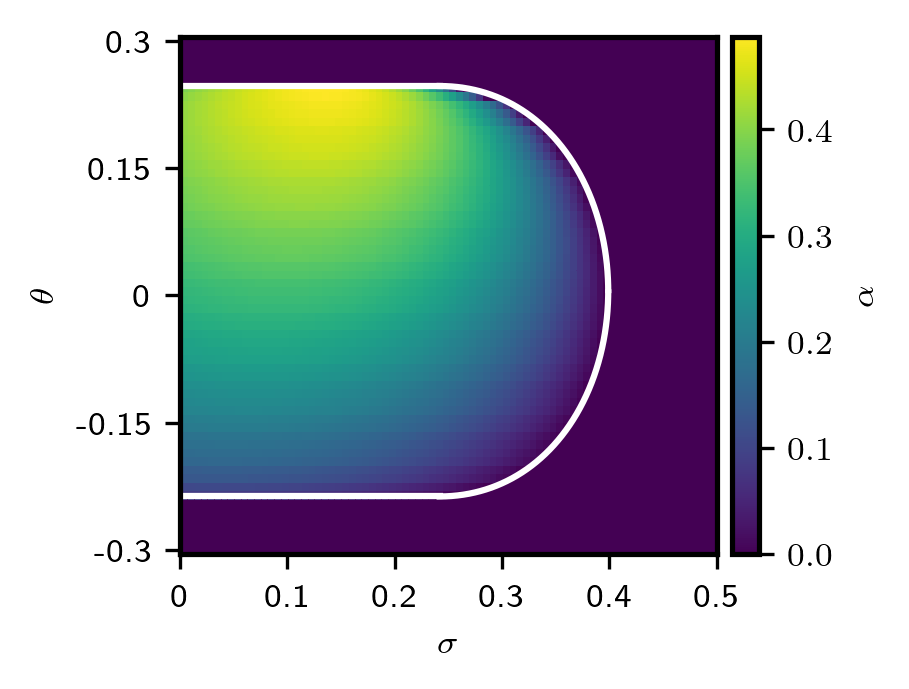

In [6]:
pu.figure_setup()
fig_size = pu.get_fig_size(7, 6)
fig, ax = plt.subplots(1, 1, figsize=fig_size)

im = ax.pcolormesh(sigma, mu, alpha, cmap='viridis', rasterized=True)
ax.set_facecolor(cm.get_cmap('viridis')(0))

dy = abs(np.diff(mu[:2]))
ax.set_yticks(mu[::5]+dy/2.)
ax.set_yticklabels(mu[::5])

ax.set_xlabel(r"$\sigma$")
ax.set_ylabel(r"$\theta$")
ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5])
ax.set_xticklabels([0,0.1,0.2,0.3,0.4,0.5])
ax.set_xlim([0, 0.5])
ax.set_yticks([-0.3,-0.15,0,0.15,0.3])
ax.set_yticklabels([-0.3,-0.15,0,0.15,0.3])
ax.set_ylim(-0.3-dy/2, 0.3+dy/2)

# Boundary
x = np.linspace(0,0.5,10000)
a = np.sqrt(-2*x**2*np.log(np.sqrt(2*np.pi*x**2)))
c = 1. / np.sqrt(2*np.exp(1)*np.pi)
ax.plot([0,c],[c,c]+dy/2, color='white')
ax.plot(x[x>c],a[x>c]+dy/2, color='white')
ax.plot([0,c],[-c,-c]+dy/2, color='white')
ax.plot(x[x>c],-a[x>c]+dy/2, color='white')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label(r"$\alpha$")

plt.subplots_adjust(bottom=0.15, left=0.15, right=0.85)
plt.savefig("../output/6.pdf", dpi=300, bbox_inches='tight')